
***
***
# 数据抓取：

Requests和Beautifulsoup简介
***
***

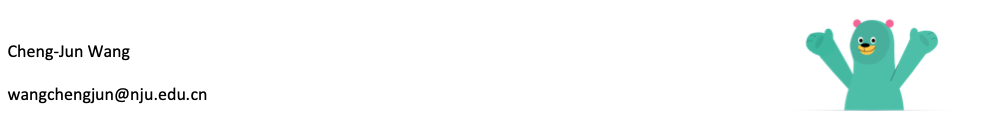


## 基本原理

爬虫就是请求网站并提取数据的自动化程序。其中请求，提取，自动化是爬虫的关键！爬虫的基本流程：

- 发起请求
    - 通过HTTP库向目标站点发起请求，也就是发送一个Request，请求可以包含额外的header等信息，等待服务器响应

- 获取响应内容
    - 如果服务器能正常响应，会得到一个Response。Response的内容便是所要获取的页面内容，类型可能是HTML、Json字符串、二进制数据（图片或者视频）等类型




- 解析内容
    - 得到的内容可能是HTML,可以用页面解析库、正则表达式进行解析；可能是Json,可以直接转换为Json对象解析；可能是二进制数据，可以做保存或者进一步的处理

- 保存数据
    - 保存形式多样，可以存为文本，也可以保存到数据库，或者保存特定格式的文件

浏览器发送消息给网址所在的服务器，这个过程就叫做**Http Request**;服务器收到浏览器发送的消息后，能够根据浏览器发送消息的内容，做相应的处理，然后把消息回传给浏览器，这个过程就是**Http Response**.

# 需要解决的问题 

- 页面解析
- 获取Javascript隐藏源数据
- 自动翻页
- 自动登录
- 连接API接口


一般的数据抓取，使用requests和beautifulsoup配合就可以了。
- 尤其是对于翻页时url出现规则变化的网页，只需要处理规则化的url就可以了。
- 以简单的例子是抓取天涯论坛上关于某一个关键词的帖子。
    - 在天涯论坛，关于雾霾的帖子的第一页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=0&order=8&k=雾霾
    - 第二页是：
http://bbs.tianya.cn/list.jsp?item=free&nextid=1&order=8&k=雾霾


# 第一个爬虫

<div>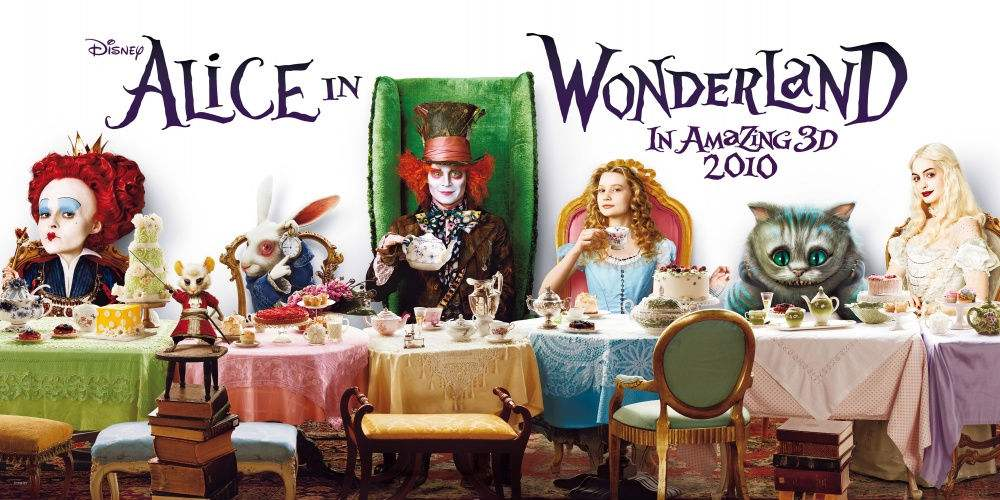</div>

Beautifulsoup Quick Start 

http://www.crummy.com/software/BeautifulSoup/bs4/doc/


http://computational-class.github.io/bigdata/data/test.html



'Once upon a time there were three little sisters,' the Dormouse began in a great hurry; 'and their names were Elsie, Lacie, and Tillie; and they lived at the bottom of a well--'

<div>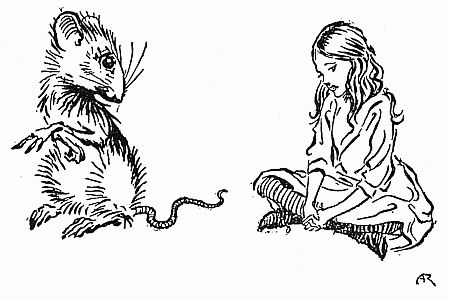</div>
'What did they live on?' said Alice, who always took a great interest in questions of eating and drinking.

'They lived on treacle,' said the Dormouse, after thinking a minute or two.

'They couldn't have done that, you know,' Alice gently remarked; 'they'd have been ill.'

'So they were,' said the Dormouse; 'very ill.'

**Alice's Adventures in Wonderland** CHAPTER VII A Mad Tea-Party http://www.gutenberg.org/files/928/928-h/928-h.htm

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
help(requests.get) 

Help on function get in module requests.api:

get(url, params=None, **kwargs)
    Sends a GET request.
    
    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the body of the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response



In [2]:
url = 'https://computational-class.github.io/bigdata/data/test.html'
content = requests.get(url)
#help(content)

In [4]:
print(content.text)

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>


In [5]:
content.encoding

'utf-8'

# Beautiful Soup
> Beautiful Soup is a Python library designed for quick turnaround projects like screen-scraping. Three features make it powerful:

- Beautiful Soup provides a few simple methods. It doesn't take much code to write an application
- Beautiful Soup automatically converts incoming documents to Unicode and outgoing documents to UTF-8. Then you just have to specify the original encoding.
- Beautiful Soup sits on top of popular Python parsers like `lxml` and `html5lib`.


# Install beautifulsoup4

### open your terminal/cmd

<del> $ pip install beautifulsoup4

# html.parser
Beautiful Soup supports the html.parser included in Python’s standard library

# lxml
but it also supports a number of third-party Python parsers. One is the lxml parser `lxml`. Depending on your setup, you might install lxml with one of these commands:

> $ apt-get install python-lxml

> $ easy_install lxml

> $ pip install lxml

# html5lib
Another alternative is the pure-Python html5lib parser `html5lib`, which parses HTML the way a web browser does. Depending on your setup, you might install html5lib with one of these commands:

> $ apt-get install python-html5lib

> $ easy_install html5lib

> $ pip install html5lib

In [7]:
url = 'http://computational-class.github.io/bigdata/data/test.html'
content = requests.get(url)
content = content.text
soup = BeautifulSoup(content, 'html.parser') 
soup

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p></body></html>

In [7]:
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


- html
    - head
        - title
    - body
        - p (class = 'title', 'story' )
            - a (class = 'sister')
                - href/id

# Select 方法


- 标签名不加任何修饰
- 类名前加点
- id名前加 #

我们也可以利用这种特性，使用soup.select()方法筛选元素，返回类型是 list

## Select方法三步骤

- Inspect (检查)
- Copy
    - Copy Selector

- 鼠标选中标题`The Dormouse's story`, 右键检查Inspect
- 鼠标移动到选中的源代码
- 右键Copy-->Copy Selector 

`body > p.title > b`


In [10]:
soup.select('body > p.title > b')[0].text

"The Dormouse's story"

### Select 方法: 通过标签名查找

In [16]:
soup.select('title')#[0].text

[<title>The Dormouse's story</title>]

In [17]:
soup.select('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [18]:
soup.select('b')

[<b>The Dormouse's story</b>]

### Select 方法: 通过类名查找

In [19]:
soup.select('.title')

[<p class="title"><b>The Dormouse's story</b></p>]

In [26]:
soup.select('.sister')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [20]:
soup.select('.story')

[<p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

### Select 方法: 通过id名查找

In [9]:
soup.select('#link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

In [21]:
soup.select('#link1')[0]['href']

'http://example.com/elsie'

### Select 方法: 组合查找

将标签名、类名、id名进行组合

- 例如查找 p 标签中，id 等于 link1的内容
 

In [22]:
soup.select('p #link1')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>]

### Select 方法:属性查找

加入属性元素
- 属性需要用大于号`>`连接
- 属性和标签属于同一节点，中间不能加空格。
 



In [23]:
soup.select("head > title")

[<title>The Dormouse's story</title>]

In [24]:
soup.select("body > p")

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

# find_all方法

In [25]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [29]:
soup.find_all('p') 

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [32]:
[i.text for i in soup('p')]

["The Dormouse's story",
 'Once upon a time there were three little sisters; and their names were\nElsie,\nLacie and\nTillie;\nand they lived at the bottom of a well.',
 '...']

In [34]:
for i in soup('p'):
    print(i.text)

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


In [31]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


In [36]:
soup('head') # or soup.head

[<head><title>The Dormouse's story</title></head>]

In [37]:
soup('body') # or soup.body

[<body>
 <p class="title"><b>The Dormouse's story</b></p>
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>
 <p class="story">...</p></body>]

In [38]:
soup('title')  # or  soup.title

[<title>The Dormouse's story</title>]

In [39]:
soup('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

In [40]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [33]:
soup.title.name

'title'

In [35]:
soup.title.string

"The Dormouse's story"

In [43]:
soup.title.text
# 推荐使用text方法

"The Dormouse's story"

In [38]:
soup.title.parent.name

'head'

In [39]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [40]:
soup.p['class']

['title']

In [41]:
soup.find_all('p', {'class', 'title'}) 

[<p class="title"><b>The Dormouse's story</b></p>]

In [42]:
soup.find_all('p', class_= 'title')

[<p class="title"><b>The Dormouse's story</b></p>]

In [44]:
soup.find_all('a', {'class', 'sister'})

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [34]:
soup.find_all('p', {'class', 'story'})[0].find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [45]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [46]:
soup('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [47]:
soup.find(id="link3")

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [48]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [55]:
soup.find_all('a', {'class', 'sister'}) # compare with soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [56]:
soup.find_all('a', {'class', 'sister'})[0]

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [57]:
soup.find_all('a', {'class', 'sister'})[0].text

'Elsie'

In [58]:
soup.find_all('a', {'class', 'sister'})[0]['href']

'http://example.com/elsie'

In [59]:
soup.find_all('a', {'class', 'sister'})[0]['id']

'link1'

In [49]:
soup.find_all(["a", "b"])

[<b>The Dormouse's story</b>,
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [50]:
print(soup.get_text())

The Dormouse's story

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


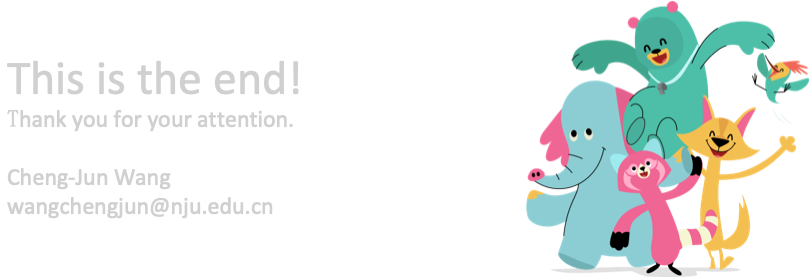